### This script contains the following:

#### 1. Importing libraries 
#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing
#### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.
#### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart
###### 4.1 Explain why you chose that number in a markdown cell
#### 5. Run the k-means algorithm.
#### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
#### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
#### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
#### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
#### 10. Propose what these results could be useful for in future steps of an analytics pipeline.
#### 11. Save data

#### 1. Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing

In [3]:
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design'
df = pd.read_csv(os.path.join(path, '5. Unsupervised Machine Learning_Clustering', 'gun_violence_ex4.csv'))

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,5,NaN,0,4,5,0,0,3,1,4,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,4,NaN,1,3,4,0,0,1,0,4,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,5,2.0,1,3,5,0,0,5,0,3,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,4,NaN,4,0,4,0,0,3,1,3,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,4,2.0,2,2,3,1,0,2,2,3,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              239677 non-null  int64  
 1   incident_id             239677 non-null  int64  
 2   date                    239677 non-null  object 
 3   day_of_week             239677 non-null  object 
 4   day                     239677 non-null  int64  
 5   month                   239677 non-null  int64  
 6   year                    239677 non-null  int64  
 7   address                 239677 non-null  object 
 8   city_or_county          239677 non-null  object 
 9   state                   239677 non-null  object 
 10  n_participants          239677 non-null  int64  
 11  n_guns_involved         140226 non-null  float64
 12  n_killed                239677 non-null  int64  
 13  n_injured               239677 non-null  int64  
 14  n_adult             

In [7]:
# deleting non numeric columns
df_clustering = df.drop(columns=['Unnamed: 0', 'date', 'day_of_week','address','city_or_county', 'state', 'location_description', 'kills_flag', 'injured_flag', 'guns_flag'])

In [8]:
# changing type of some columns float to int
cols_to_convert = ['n_guns_involved', 'latitude', 'longitude', 'state_house_district', 'state_senate_district', 'congressional_district']
df_clustering[cols_to_convert] = df[cols_to_convert].fillna(0).astype(int)

In [10]:
df_clustering.head()

,incident_id,day,month,year,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,latitude,longitude,state_house_district,state_senate_district,congressional_district
0,461105,1,1,2013,5,0,0,4,5,0,0,3,1,4,1,40,-79,0,0,14
1,460726,1,1,2013,4,0,1,3,4,0,0,1,0,4,1,33,-118,62,35,43
2,478855,1,1,2013,5,2,1,3,5,0,0,5,0,3,2,41,-82,56,13,9
3,478925,5,1,2013,4,0,4,0,4,0,0,3,1,3,1,39,-104,40,28,6
4,478959,7,1,2013,4,2,2,2,3,1,0,2,2,3,1,36,-79,62,27,6


In [11]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   incident_id             239677 non-null  int64
 1   day                     239677 non-null  int64
 2   month                   239677 non-null  int64
 3   year                    239677 non-null  int64
 4   n_participants          239677 non-null  int64
 5   n_guns_involved         239677 non-null  int32
 6   n_killed                239677 non-null  int64
 7   n_injured               239677 non-null  int64
 8   n_adult                 239677 non-null  int64
 9   n_teen                  239677 non-null  int64
 10  n_child                 239677 non-null  int64
 11  n_male                  239677 non-null  int64
 12  n_female                239677 non-null  int64
 13  n_victim                239677 non-null  int64
 14  n_suspect               239677 non-null  int64
 15  

#### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_clustering).score(df_clustering) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\eog87\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eog87\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eog87\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eog87\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-2.059402329579803e+16,
 -5016072634946428.0,
 -2239392388506575.5,
 -1236970848929198.0,
 -759965172066777.8,
 -507695807932506.2,
 -373639734534121.06,
 -288738538042057.6,
 -233575515686462.7]

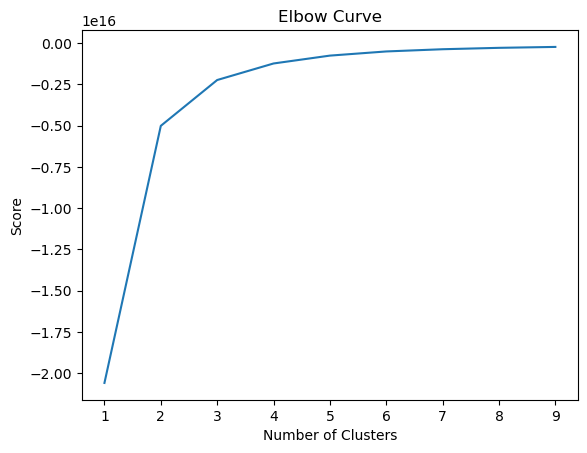

In [11]:
# Plot the elbow curve using PyLab.

elbow_curve = pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart

The curve begins to flatten out after 3, so the optimal number of cluster is 3

#### 5. Run the k-means algorithm.

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_clustering)

C:\Users\eog87\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

#### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [21]:
df_clustering

,incident_id,day,month,year,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,latitude,longitude,state_house_district,state_senate_district,congressional_district
0,461105,1,1,2013,5,0,0,4,5,0,0,3,1,4,1,40,-79,0,0,14
1,460726,1,1,2013,4,0,1,3,4,0,0,1,0,4,1,33,-118,62,35,43
2,478855,1,1,2013,5,2,1,3,5,0,0,5,0,3,2,41,-82,56,13,9
3,478925,5,1,2013,4,0,4,0,4,0,0,3,1,3,1,39,-104,40,28,6
4,478959,7,1,2013,4,2,2,2,3,1,0,2,2,3,1,36,-79,62,27,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,31,3,2018,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
239673,1083139,31,3,2018,2,1,1,0,2,0,0,2,0,1,1,31,-93,23,31,4
239674,1083151,31,3,2018,1,1,0,1,1,0,0,1,0,1,0,29,-90,85,7,2
239675,1082514,31,3,2018,1,1,1,0,1,0,0,1,0,1,0,29,-95,149,17,9


In [22]:
df_clustering['clusters'] = kmeans.fit_predict(df_clustering)

C:\Users\eog87\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
df_clustering.head()

,incident_id,day,month,year,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,...,n_male,n_female,n_victim,n_suspect,latitude,longitude,state_house_district,state_senate_district,congressional_district,clusters
0,461105,1,1,2013,5,0,0,4,5,0,...,3,1,4,1,40,-79,0,0,14,2
1,460726,1,1,2013,4,0,1,3,4,0,...,1,0,4,1,33,-118,62,35,43,2
2,478855,1,1,2013,5,2,1,3,5,0,...,5,0,3,2,41,-82,56,13,9,2
3,478925,5,1,2013,4,0,4,0,4,0,...,3,1,3,1,39,-104,40,28,6,2
4,478959,7,1,2013,4,2,2,2,3,1,...,2,2,3,1,36,-79,62,27,6,2


In [24]:
df_clustering['clusters'].value_counts()

clusters
1    81888
0    78919
2    78870
Name: count, dtype: int64

#### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

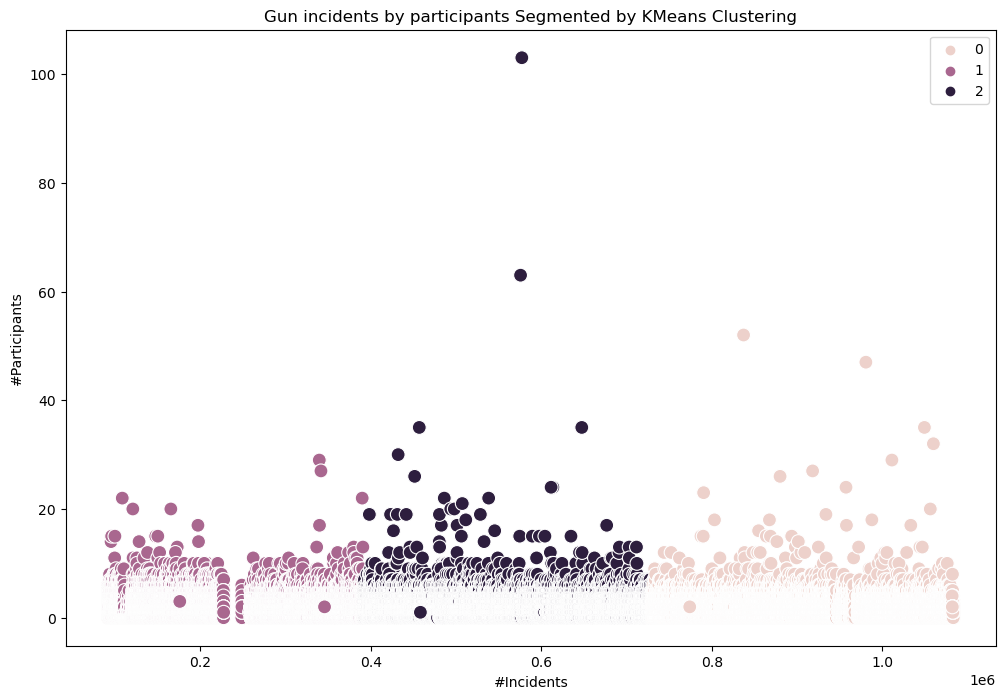

In [25]:
plt.figure(figsize=(12,8))
cluster_scatterplot = sns.scatterplot(x=df_clustering['incident_id'], y=df_clustering['n_participants'], hue=kmeans.labels_, s=100) 

plt.title('Gun incidents by participants Segmented by KMeans Clustering')
plt.xlabel('#Incidents') # Label x-axis.
plt.ylabel('#Participants') # Label y-axis.
plt.show()

In [27]:
path2 = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\7. Creating Data Dashboards\Github'
cluster_scatterplot.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'cluster_scatterplot.png'))

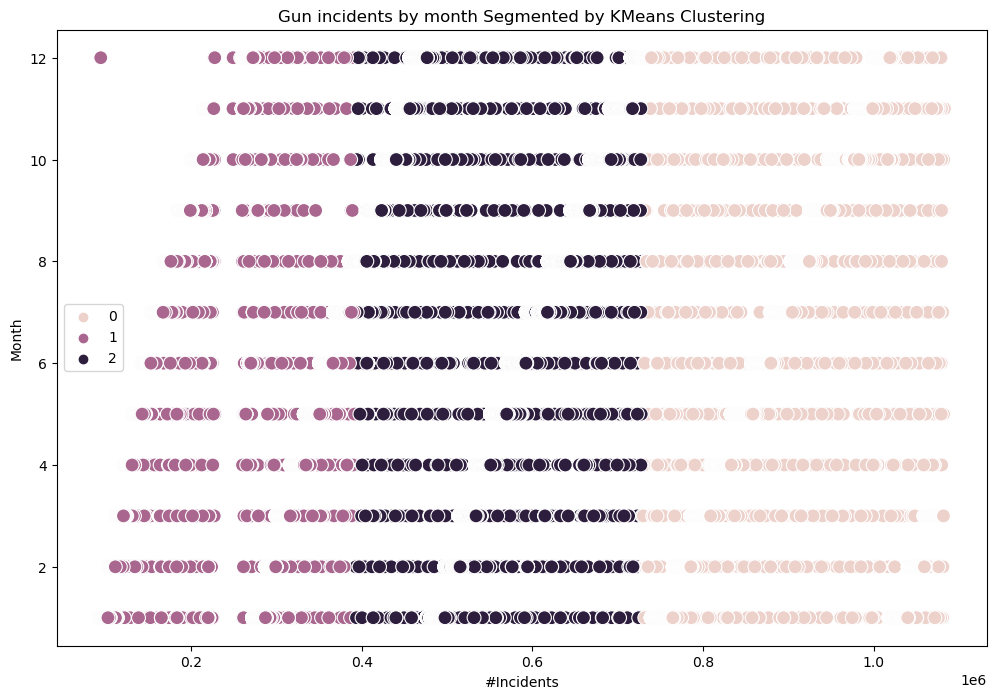

In [26]:
plt.figure(figsize=(12,8))
cluster_scatterplot2 = sns.scatterplot(x=df_clustering['incident_id'], y=df_clustering['month'], hue=kmeans.labels_, s=100) 

plt.title('Gun incidents by month Segmented by KMeans Clustering')
plt.xlabel('#Incidents') # Label x-axis.
plt.ylabel('Month') # Label y-axis.
plt.show()

In [28]:
cluster_scatterplot2.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'cluster_scatterplot2.png'))

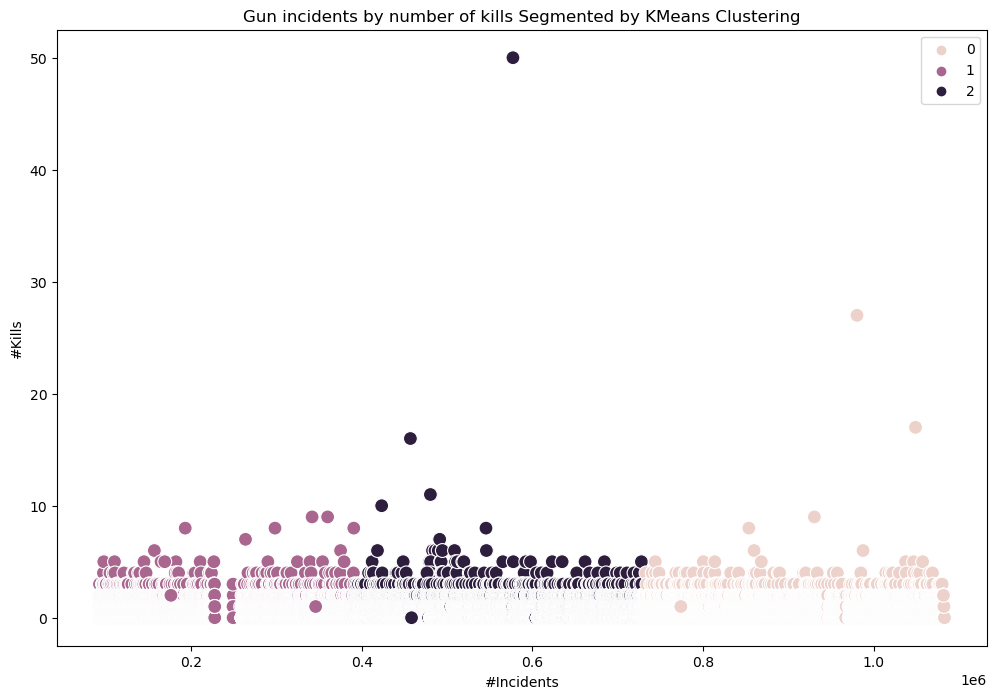

In [29]:
cluster_scatterplot3 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['incident_id'], y=df_clustering['n_killed'], hue=kmeans.labels_, s=100) 

plt.title('Gun incidents by number of kills Segmented by KMeans Clustering')
plt.xlabel('#Incidents') # Label x-axis.
plt.ylabel('#Kills') # Label y-axis.
plt.show()

In [30]:
cluster_scatterplot3.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'cluster_scatterplot3.png'))

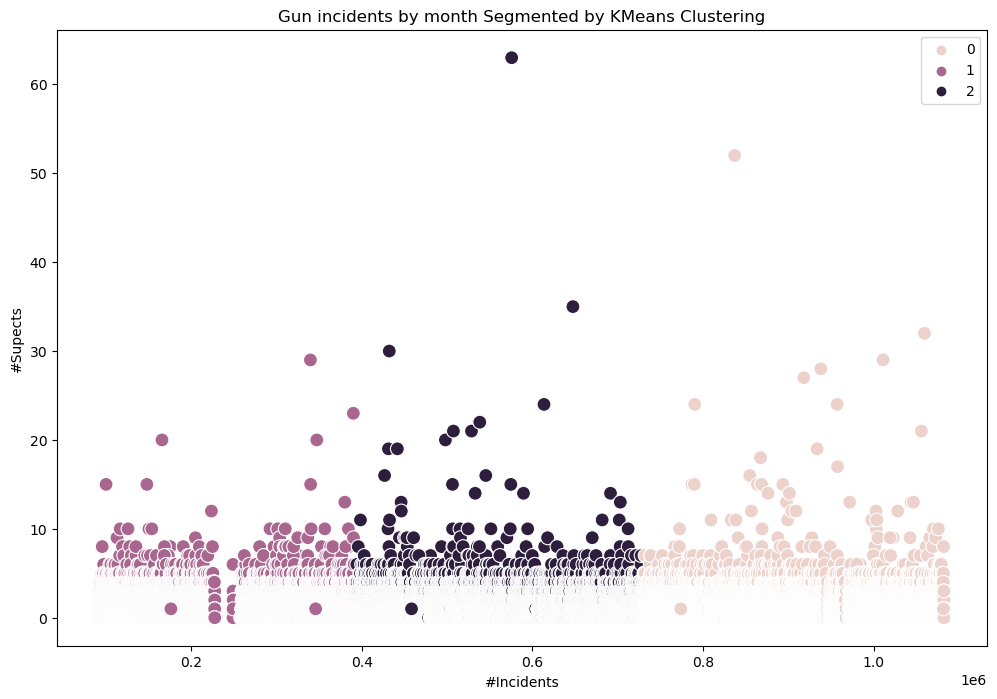

In [31]:
cluster_scatterplot4 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['incident_id'], y=df_clustering['n_suspect'], hue=kmeans.labels_, s=100) 

plt.title('Gun incidents by month Segmented by KMeans Clustering')
plt.xlabel('#Incidents') # Label x-axis.
plt.ylabel('#Supects') # Label y-axis.
plt.show()

In [32]:
cluster_scatterplot4.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'cluster_scatterplot4.png'))

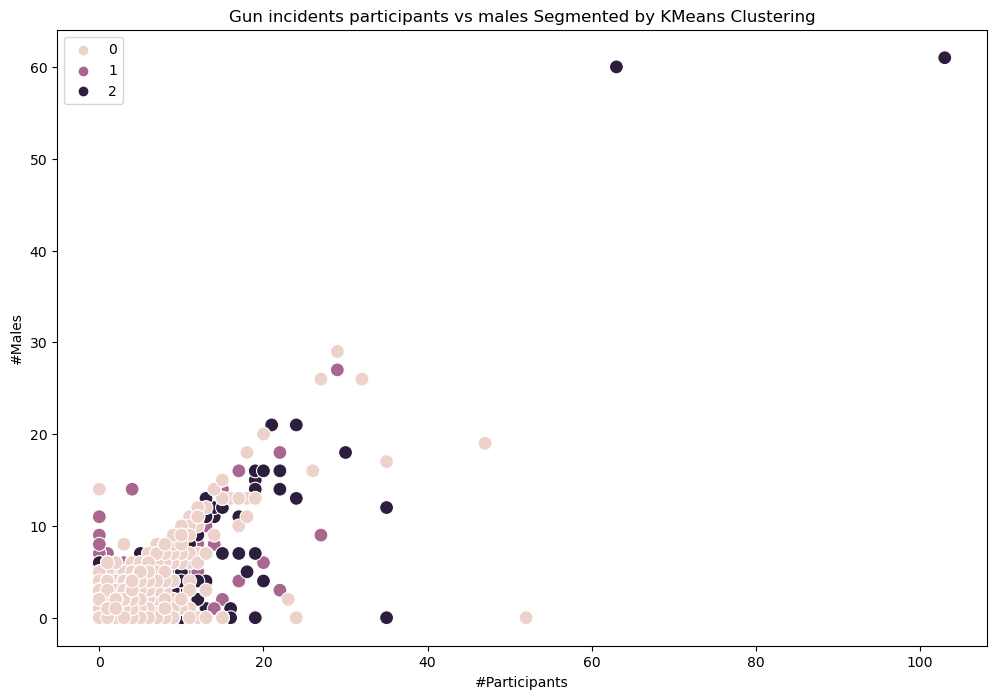

In [33]:
cluster_scatterplot5 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['n_participants'], y=df_clustering['n_male'], hue=kmeans.labels_, s=100) 

plt.title('Gun incidents participants vs males Segmented by KMeans Clustering')
plt.xlabel('#Participants') # Label x-axis.
plt.ylabel('#Males') # Label y-axis.
plt.show()

In [34]:
cluster_scatterplot5.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'cluster_scatterplot5.png'))

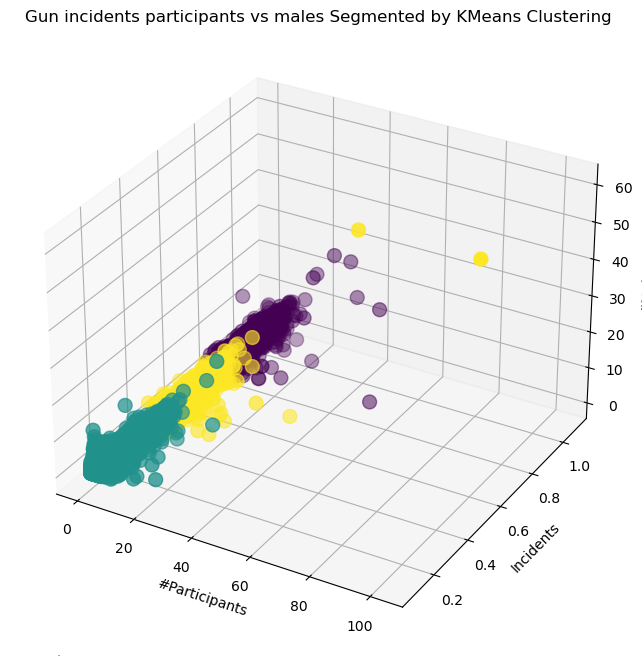

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clustering['n_participants'], df_clustering['incident_id'], df_clustering['n_male'], c=kmeans.labels_, s=100)

# Set labels and title
ax.set_xlabel('#Participants')
ax.set_ylabel('Incidents')
ax.set_zlabel('#Males')
ax.set_title('Gun incidents participants vs males Segmented by KMeans Clustering')

# Show the plot
plt.show()

In [36]:
fig.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', '3dscatterplot.png'))

#### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [45]:
df_clustering.loc[df_clustering['clusters'] == 2, 'cluster'] = 'dark'
df_clustering.loc[df_clustering['clusters'] == 1, 'cluster'] = 'purple'
df_clustering.loc[df_clustering['clusters'] == 0, 'cluster'] = 'pink'

In [47]:
df_clustering.groupby('cluster').agg({'incident_id':['mean', 'median'], 
                                      'n_participants':['mean', 'median'], 
                                      'n_male':['mean', 'median'],
                                      'n_suspect':['mean', 'median'],
                                      'n_killed':['mean', 'median'],
                                      'month':['mean', 'median']})

incident_id           n_participants           n_male         \
                  mean    median           mean median      mean median   
cluster                                                                   
dark     553811.823200  549986.0       1.590511    1.0  1.287274    1.0   
pink     230461.745815  210853.0       1.578027    1.0  1.354355    1.0   
purple   906205.355862  902927.0       1.495799    1.0  1.224758    1.0   

        n_suspect         n_killed            month         
             mean median      mean median      mean median  
cluster                                                     
dark     0.808391    1.0  0.257249    0.0  7.435317    8.0  
pink     0.853274    1.0  0.247824    0.0  5.808928    6.0  
purple   0.831637    1.0  0.251968    0.0  5.832233    5.0

Based on these statistics, it appears that the Pink Cluster is the most consistent overall, as it generally has the smallest differences between the mean and median values across all indicators. 
The Dark Cluster exhibits slightly larger differences, indicating slightly more variability within those clusters for some indicators. 

#### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

Clustering results serve as a foundation for various downstream analytics tasks and strategic decision-making processes aimed at enhancing customer experience, optimizing marketing efforts, and driving business growth. Some examples are customer segmentation, product recommendations, predictive modeling, a/b testing an customer lifetime value estimation.

#### 11. Save data

In [50]:
# Export the dataframes to csv file
df.to_csv(os.path.join(path, '5. Unsupervised Machine Learning_Clustering','gun_violence_ex5.csv'))
df_clustering.to_csv(os.path.join(path,'5. Unsupervised Machine Learning_Clustering','gun_violence_ex5_clustering.csv'))